# RWS getijdemetingen IJmuiden

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data_home = './Tide_RWS_240213/'
data_home = 'rws_getij_HvH_IJM_may2013_onvr202402022'
fname = 'Getij.csv'
pth = os.path.join(data_home, fname)
assert os.path.isfile(pth), "Can't open file {}".format(pth)

AssertionError: Can't open file ./Tide_RWS_240213/Getij.csv

In [5]:
usecols = ['datum tijd', 'waarde', 'rks_xcrdgs', 'rks_ycrdgs',
           'tydehd', 'tydstp', 'rks_begdat', 'loccod', 'loc_xcrdgs', 'loc_ycrdgs', 'rks_begtyd', 'rks_enddat', 'rks_endtyd']
usecols = ['datum tijd', 'waarde', 'loccod', 'loc_xcrdgs', 'loc_ycrdgs']

data_all = pd.read_csv(pth, header=0, sep=';', usecols=usecols, index_col='datum tijd', parse_dates=True, dayfirst=True)

In [6]:
tideHVH = data_all.loc[data_all['loccod'] == 'HOEKVHLD'].copy()
tideIJM = data_all.loc[data_all['loccod'] == 'IJMDBNN'].copy()
tideHVH['waarde'][tideHVH['waarde'] > 1000] = np.nan
tideIJM['waarde'][tideIJM['waarde'] > 1000] = np.nan
tideHVH['waarde'] /= 100. # to m
tideIJM['waarde'] /= 100. # to m

print(tideHVH)
print()
print(tideIJM)

Empty DataFrame
Columns: [loccod, loc_xcrdgs, loc_ycrdgs, waarde]
Index: []

                      loccod  loc_xcrdgs  loc_ycrdgs  waarde
datum tijd                                                  
2013-05-01 00:00:00  IJMDBNN    10165000    49835000   -0.44
2013-05-01 00:10:00  IJMDBNN    10165000    49835000   -0.45
2013-05-01 00:20:00  IJMDBNN    10165000    49835000   -0.45
2013-05-01 00:30:00  IJMDBNN    10165000    49835000   -0.45
2013-05-01 00:40:00  IJMDBNN    10165000    49835000   -0.48
...                      ...         ...         ...     ...
2013-05-31 23:10:00  IJMDBNN    10165000    49835000   -0.42
2013-05-31 23:20:00  IJMDBNN    10165000    49835000   -0.41
2013-05-31 23:30:00  IJMDBNN    10165000    49835000   -0.42
2013-05-31 23:40:00  IJMDBNN    10165000    49835000   -0.43
2013-05-31 23:50:00  IJMDBNN    10165000    49835000   -0.42

[4464 rows x 4 columns]


/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_18869/3037961306.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tideHVH['waarde'][tideHVH['waarde'] > 1000] = np.nan
/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_1

In [7]:
tlim = np.datetime64('2013-05-01'), np.datetime64('2013-06-01')

tideHVH.index >= tlim[0]
tideHVH.index <= tlim[1]
np.logical_and(tideHVH.index >= tlim[0], tideHVH.index <= tlim[1]).sum()
np.logical_and(tideIJM.index >= tlim[0], tideIJM.index <= tlim[1]).sum()
tideIJM.loc[np.logical_and(tideIJM.index >= tlim[0], tideIJM.index <= tlim[1])]

,loccod,loc_xcrdgs,loc_ycrdgs,waarde
datum tijd,,,,
2013-05-01 00:00:00,IJMDBNN,10165000,49835000,-0.44
2013-05-01 00:10:00,IJMDBNN,10165000,49835000,-0.45
2013-05-01 00:20:00,IJMDBNN,10165000,49835000,-0.45
2013-05-01 00:30:00,IJMDBNN,10165000,49835000,-0.45
2013-05-01 00:40:00,IJMDBNN,10165000,49835000,-0.48
...,...,...,...,...
2013-05-31 23:10:00,IJMDBNN,10165000,49835000,-0.42
2013-05-31 23:20:00,IJMDBNN,10165000,49835000,-0.41
2013-05-31 23:30:00,IJMDBNN,10165000,49835000,-0.42


Done


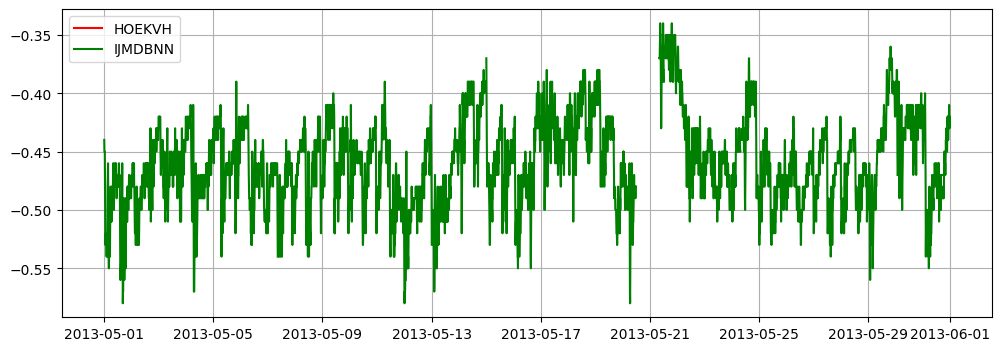

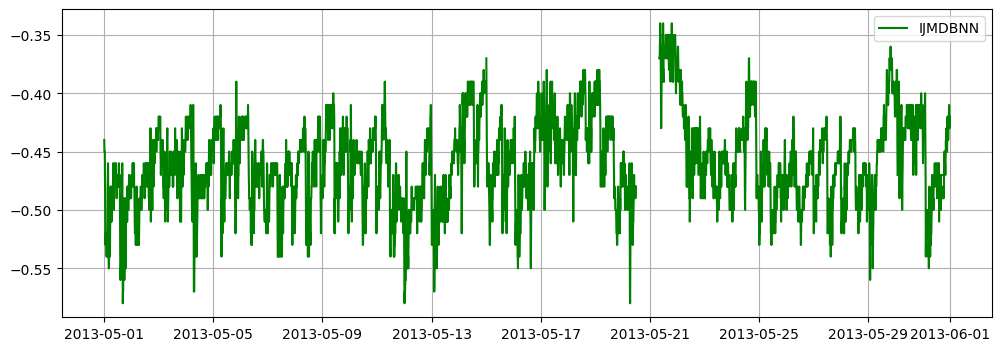

Done


In [10]:
tlim = (np.datetime64('2013-05-01'), np.datetime64('2013-06-01'))

plt.plot(tideHVH['waarde'].loc[np.logical_and(tideHVH.index >= tlim[0], tideHVH.index <= tlim[1])], color='red', label='HOEKVH')
plt.plot(tideIJM['waarde'].loc[np.logical_and(tideIJM.index >= tlim[0], tideIJM.index <= tlim[1])], color='green', label='IJMDBNN')
plt.gcf().set_size_inches(12, 4)
plt.grid(True)
plt.gca().legend()

plt.gcf().savefig("rwsGetijHOEKVH_IJMBNN.png")
print("Done")
plt.show()

#plt.plot(tideHVH['waarde'].loc[np.logical_and(tideHVH.index >= tlim[0], tideHVH.index <= tlim[1])], color='red', label='HOEKVH')
plt.plot(tideIJM['waarde'].loc[np.logical_and(tideIJM.index >= tlim[0], tideIJM.index <= tlim[1])], color='green', label='IJMDBNN')
plt.gcf().set_size_inches(12, 4)
plt.grid(True)
plt.gca().legend()

plt.gcf().savefig("rwsGetijIJMBNN.png")
plt.show()
print("Done")

In [107]:
tideIJM.index[0], tideIJM['waarde'][0]

/var/folders/90/m51x_b713y561gzh2kzy18d00000gq/T/ipykernel_56845/2152644796.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tideIJM.index[0], tideIJM['waarde'][0]


(Timestamp('2013-05-01 00:00:00'), -44.0)

In [108]:
pd.Series(data['waarde'], index=data[['datum tijd'])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (3446622576.py, line 1)